In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
crashes_sample = pd.read_csv("crashes.sample2020.csv")

**Crashes EDA**

In [47]:
crashes_sample.head(10)

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,0211e1f766f3940dfa87375661d25b716655e908c320cc...,JC301403,NaN,06/11/2019 08:40:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,3.0,0.0,8,3,6,41.794779,-87.623828,POINT (-87.623828038036 41.794778764028)
1,02e2ed3606a50dda185f5e97c57a45552087d6fbea1c4b...,JB256393,NaN,05/09/2018 11:30:00 AM,25,NO CONTROLS,NO CONTROLS,RAIN,DAYLIGHT,ANGLE,...,0.0,0.0,2.0,0.0,11,4,5,41.721290,-87.628510,POINT (-87.628509593966 41.72128957001)
2,03def753c76d0105940f82e9eaac6f1d87683b7a574c20...,JB246843,NaN,05/02/2018 12:50:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,OTHER OBJECT,...,1.0,0.0,0.0,0.0,12,4,5,41.809781,-87.594213,POINT (-87.594212812011 41.809781151018)
3,14fc616db83000e28d672601062a56d76583c0889a764b...,JB372787,NaN,07/31/2018 11:25:00 AM,35,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,2.0,0.0,11,3,7,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989)
4,1a9af7862e8471daf453354e6aae4561d0ff4f2f1bfb30...,JB490362,NaN,10/25/2018 10:50:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,...,0.0,0.0,1.0,0.0,22,5,10,41.946644,-87.686894,POINT (-87.686894106014 41.946643528978)
5,222a9d240cf0a5da4bbb2e1033fd6680b97cae8b85b095...,JC498042,NaN,11/04/2019 11:15:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,...,0.0,2.0,1.0,0.0,11,2,11,41.880660,-87.740728,POINT (-87.740728133013 41.880660066981)
6,cbe9312f483d573e831a7663e3d0734f3784651fd6e62e...,JC381250,NaN,08/06/2019 03:00:00 PM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,...,0.0,0.0,2.0,0.0,15,3,8,NaN,NaN,NaN
7,2729b0f4ed77f242d65c7ef3576f732de412fcb2a67a71...,JC139512,Y,02/04/2019 01:00:00 AM,30,NO CONTROLS,NO CONTROLS,UNKNOWN,UNKNOWN,PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,1,2,2,41.953523,-87.702969,POINT (-87.702969180954 41.953523443989)
8,29977192763df0066add561c6ea8ad1c3dcc9d399e2091...,JB261235,NaN,05/12/2018 06:00:00 PM,30,NO CONTROLS,NO CONTROLS,RAIN,DAYLIGHT,REAR END,...,0.0,0.0,2.0,0.0,18,7,5,42.010941,-87.682754,POINT (-87.68275403105 42.010940800028)
9,474ffd74159030392c13e1338f72d7d55d8becd84a8270...,JC235757,NaN,04/23/2019 05:30:00 PM,25,NO CONTROLS,NO CONTROLS,CLEAR,DUSK,REAR END,...,0.0,0.0,1.0,0.0,17,3,4,41.970333,-87.687606,POINT (-87.68760619802 41.970333488046)


In [48]:
crashes_sample.dtypes

CRASH_RECORD_ID                   object
RD_NO                             object
CRASH_DATE_EST_I                  object
CRASH_DATE                        object
POSTED_SPEED_LIMIT                 int64
TRAFFIC_CONTROL_DEVICE            object
DEVICE_CONDITION                  object
WEATHER_CONDITION                 object
LIGHTING_CONDITION                object
FIRST_CRASH_TYPE                  object
TRAFFICWAY_TYPE                   object
LANE_CNT                         float64
ALIGNMENT                         object
ROADWAY_SURFACE_COND              object
ROAD_DEFECT                       object
REPORT_TYPE                       object
CRASH_TYPE                        object
INTERSECTION_RELATED_I            object
NOT_RIGHT_OF_WAY_I                object
HIT_AND_RUN_I                     object
DAMAGE                            object
DATE_POLICE_NOTIFIED              object
PRIM_CONTRIBUTORY_CAUSE           object
SEC_CONTRIBUTORY_CAUSE            object
STREET_NO       

In [49]:
crashes_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33408 entries, 0 to 33407
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH_RECORD_ID                33408 non-null  object 
 1   RD_NO                          33021 non-null  object 
 2   CRASH_DATE_EST_I               2337 non-null   object 
 3   CRASH_DATE                     33408 non-null  object 
 4   POSTED_SPEED_LIMIT             33408 non-null  int64  
 5   TRAFFIC_CONTROL_DEVICE         33408 non-null  object 
 6   DEVICE_CONDITION               33408 non-null  object 
 7   WEATHER_CONDITION              33408 non-null  object 
 8   LIGHTING_CONDITION             33408 non-null  object 
 9   FIRST_CRASH_TYPE               33408 non-null  object 
 10  TRAFFICWAY_TYPE                33408 non-null  object 
 11  LANE_CNT                       10996 non-null  float64
 12  ALIGNMENT                      33408 non-null 

In [50]:
crashes_sample.shape

(33408, 49)

In [54]:
#scan for duplicate rows
duplicate_rows_crashes = crashes_sample[crashes_sample.duplicated()]
print("number of duplicate rows:", duplicate_rows_crashes.shape)

number of duplicate rows: (0, 49)


In [55]:
#% of missing values per feature in crashes
crashes_sample.isnull().mean().round(2)

CRASH_RECORD_ID                  0.00
RD_NO                            0.01
CRASH_DATE_EST_I                 0.93
CRASH_DATE                       0.00
POSTED_SPEED_LIMIT               0.00
TRAFFIC_CONTROL_DEVICE           0.00
DEVICE_CONDITION                 0.00
WEATHER_CONDITION                0.00
LIGHTING_CONDITION               0.00
FIRST_CRASH_TYPE                 0.00
TRAFFICWAY_TYPE                  0.00
LANE_CNT                         0.67
ALIGNMENT                        0.00
ROADWAY_SURFACE_COND             0.00
ROAD_DEFECT                      0.00
REPORT_TYPE                      0.03
CRASH_TYPE                       0.00
INTERSECTION_RELATED_I           0.76
NOT_RIGHT_OF_WAY_I               0.95
HIT_AND_RUN_I                    0.71
DAMAGE                           0.00
DATE_POLICE_NOTIFIED             0.00
PRIM_CONTRIBUTORY_CAUSE          0.00
SEC_CONTRIBUTORY_CAUSE           0.00
STREET_NO                        0.00
STREET_DIRECTION                 0.00
STREET_NAME 

In [56]:
#remove features with 100% missing values in crashes
crashes_sample.drop('WORK_ZONE_TYPE', axis = 1)
crashes_sample.drop('DOORING_I', axis = 1)
crashes_sample.drop('WORKERS_PRESENT_I', axis = 1)

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,0211e1f766f3940dfa87375661d25b716655e908c320cc...,JC301403,NaN,06/11/2019 08:40:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,3.0,0.0,8,3,6,41.794779,-87.623828,POINT (-87.623828038036 41.794778764028)
1,02e2ed3606a50dda185f5e97c57a45552087d6fbea1c4b...,JB256393,NaN,05/09/2018 11:30:00 AM,25,NO CONTROLS,NO CONTROLS,RAIN,DAYLIGHT,ANGLE,...,0.0,0.0,2.0,0.0,11,4,5,41.721290,-87.628510,POINT (-87.628509593966 41.72128957001)
2,03def753c76d0105940f82e9eaac6f1d87683b7a574c20...,JB246843,NaN,05/02/2018 12:50:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,OTHER OBJECT,...,1.0,0.0,0.0,0.0,12,4,5,41.809781,-87.594213,POINT (-87.594212812011 41.809781151018)
3,14fc616db83000e28d672601062a56d76583c0889a764b...,JB372787,NaN,07/31/2018 11:25:00 AM,35,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,2.0,0.0,11,3,7,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989)
4,1a9af7862e8471daf453354e6aae4561d0ff4f2f1bfb30...,JB490362,NaN,10/25/2018 10:50:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,...,0.0,0.0,1.0,0.0,22,5,10,41.946644,-87.686894,POINT (-87.686894106014 41.946643528978)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33403,28ca6e7fbfcb4cf2774b888546d2de48cd912977cae53e...,JD312732,NaN,07/28/2020 11:30:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,...,1.0,0.0,1.0,0.0,11,3,7,41.756876,-87.722322,POINT (-87.722321738255 41.756876394825)
33404,2e8cac345e25c4f9cb7f875d6aa20e3141cc1619703c4e...,JD313798,NaN,07/29/2020 09:40:00 AM,45,YIELD,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,...,0.0,0.0,2.0,0.0,9,4,7,41.958987,-87.933994,POINT (-87.933993928974 41.958986950953)
33405,674d6a3c4f2df46285b73f5003a8ee0342cc0ab5cd1f66...,JD314340,NaN,07/29/2020 05:20:00 PM,15,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,FIXED OBJECT,...,0.0,0.0,2.0,0.0,17,4,7,41.809131,-87.691934,POINT (-87.691934210819 41.809131202018)
33406,2a82ef3a871842cf16a0c04108aff04f7926308b399d1d...,JD314360,NaN,07/29/2020 05:17:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,2.0,0.0,17,4,7,41.868063,-87.774077,POINT (-87.774077298863 41.868063121814)


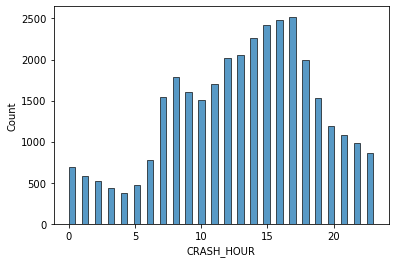

In [61]:
#Histogram of crash hour
sns.histplot(x=crashes_sample['CRASH_HOUR'])

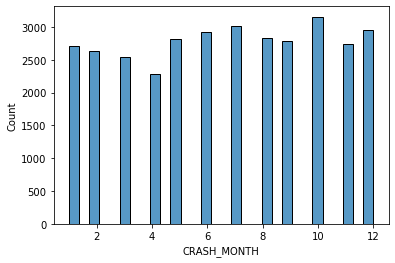

In [59]:
#Histogram of crash month
sns.histplot(x=crashes_sample['CRASH_MONTH'])

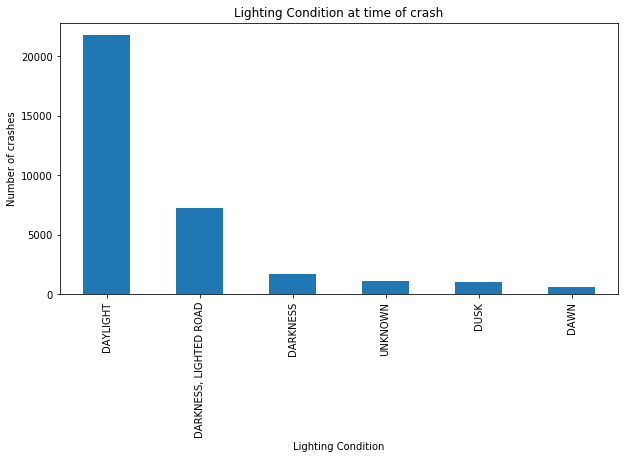

In [69]:
# Plotting a Histogram of Lighting Condition
crashes_sample.LIGHTING_CONDITION.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Lighting Condition at time of crash")
plt.ylabel('Number of crashes')
plt.xlabel('Lighting Condition');

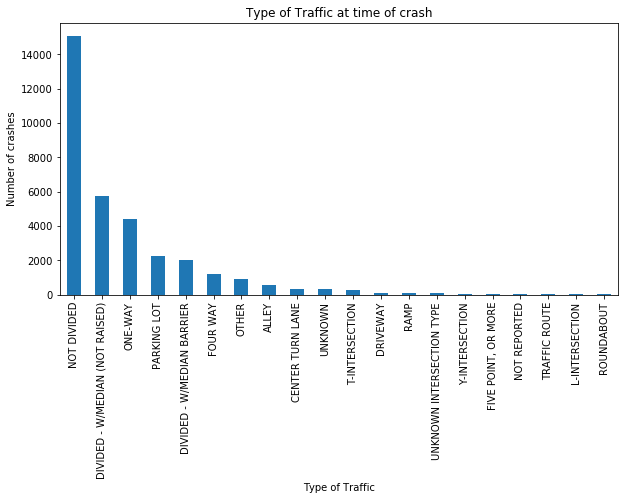

In [70]:
# Plotting a Histogram of Traffic Condition
crashes_sample.TRAFFICWAY_TYPE.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Type of Traffic at time of crash")
plt.ylabel('Number of crashes')
plt.xlabel('Type of Traffic');

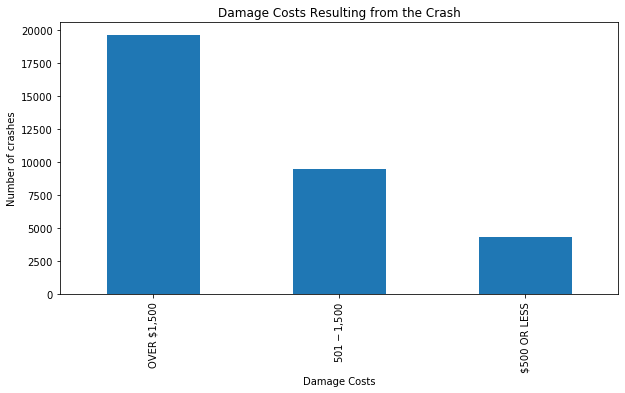

In [72]:
# Plotting a Histogram of Damage Costs
crashes_sample.DAMAGE.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Damage Costs Resulting from the Crash")
plt.ylabel('Number of crashes')
plt.xlabel('Damage Costs');

count     33408
unique       12
top          10
freq       3155
Name: CRASH_MONTH, dtype: object


/Users/catherineking/opt/anaconda3/envs/vision_zero/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


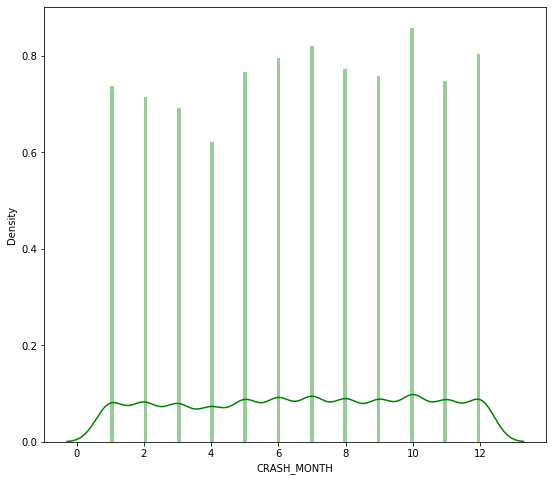

In [35]:
#distribution of CRASH_MONTH
print(crashes_sample['CRASH_MONTH'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(crashes_sample['CRASH_MONTH'], color='g', bins=100, hist_kws={'alpha': 0.4});

count     33408
unique        7
top           6
freq       5447
Name: CRASH_DAY_OF_WEEK, dtype: object


/Users/catherineking/opt/anaconda3/envs/vision_zero/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


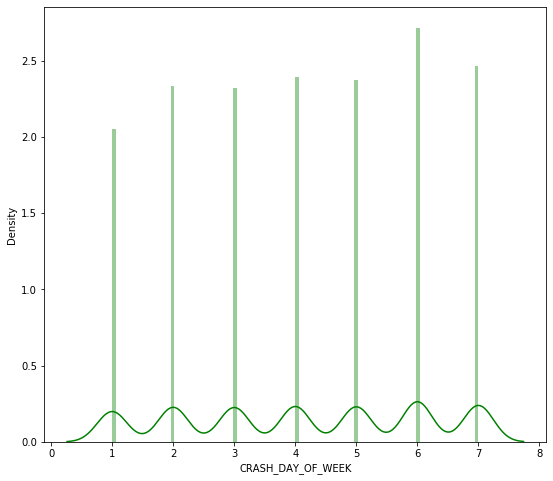

In [36]:
#distribution of CRASH_DAY
print(crashes_sample['CRASH_DAY_OF_WEEK'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(crashes_sample['CRASH_DAY_OF_WEEK'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [37]:
list(set(crashes_sample.dtypes.tolist()))

[dtype('O')]

**Vehicle EDA**

In [75]:
vehicles_sample = pd.read_csv("vehicles.sample.csv")

/Users/catherineking/opt/anaconda3/envs/vision_zero/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (21,40,41,42,44,48,49,50,58,59,61) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [73]:
vehicles_sample.head(10)

,CRASH_UNIT_ID,CRASH_RECORD_ID,RD_NO,CRASH_DATE,UNIT_NO,UNIT_TYPE,NUM_PASSENGERS,VEHICLE_ID,CMRC_VEH_I,MAKE,...,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT,VEHICLE_CONFIG,CARGO_BODY_TYPE,LOAD_TYPE,HAZMAT_OUT_OF_SERVICE_I,MCS_OUT_OF_SERVICE_I,HAZMAT_CLASS
0,228894,2524b06fc6634bd349fc1d7f132c8362529473768f6ac2...,JA453603,10/01/2017 02:20:00 AM,1,DRIVER,NaN,224185,NaN,DODGE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,228895,2524b06fc6634bd349fc1d7f132c8362529473768f6ac2...,JA453603,10/01/2017 02:20:00 AM,2,PARKED,NaN,224187,NaN,GENERAL MOTORS CORP.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,228896,2524b06fc6634bd349fc1d7f132c8362529473768f6ac2...,JA453603,10/01/2017 02:20:00 AM,3,PARKED,NaN,224191,NaN,SATURN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,228905,f7210aec9ac43a7b36c30b49033adebcb3060b96580341...,JA453640,10/01/2017 02:41:00 AM,1,DRIVER,NaN,224199,NaN,FORD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,228906,f7210aec9ac43a7b36c30b49033adebcb3060b96580341...,JA453640,10/01/2017 02:41:00 AM,2,DRIVERLESS,NaN,224203,NaN,CHEVROLET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,228907,f7210aec9ac43a7b36c30b49033adebcb3060b96580341...,JA453640,10/01/2017 02:41:00 AM,3,DRIVERLESS,NaN,224205,NaN,NISSAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,228915,53d588755aa03be5b3b776870bf078f1aa4189acb35806...,JA453635,10/01/2017 03:00:00 AM,1,DRIVER,NaN,224202,NaN,KIA MOTORS CORP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,228956,59c22d986e628b7036cb28a542115527689bc90a7abb36...,JA453707,10/01/2017 06:04:00 AM,1,DRIVER,NaN,224238,NaN,DODGE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,228975,a785b85272d9a598244d834dc73de3a53b08c7b25a202e...,JA453725,10/01/2017 07:07:00 AM,1,DRIVER,NaN,224254,NaN,"TOYOTA MOTOR COMPANY, LTD.",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,228976,a785b85272d9a598244d834dc73de3a53b08c7b25a202e...,JA453725,10/01/2017 07:07:00 AM,2,PARKED,NaN,224257,NaN,JEEP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
vehicles_sample.dtypes

CRASH_UNIT_ID               int64
CRASH_RECORD_ID            object
RD_NO                      object
CRASH_DATE                 object
UNIT_NO                     int64
                            ...  
CARGO_BODY_TYPE            object
LOAD_TYPE                  object
HAZMAT_OUT_OF_SERVICE_I    object
MCS_OUT_OF_SERVICE_I       object
HAZMAT_CLASS               object
Length: 72, dtype: object

In [77]:
vehicles_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75673 entries, 0 to 75672
Data columns (total 72 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CRASH_UNIT_ID             75673 non-null  int64  
 1   CRASH_RECORD_ID           75673 non-null  object 
 2   RD_NO                     67544 non-null  object 
 3   CRASH_DATE                75673 non-null  object 
 4   UNIT_NO                   75673 non-null  int64  
 5   UNIT_TYPE                 75561 non-null  object 
 6   NUM_PASSENGERS            11633 non-null  float64
 7   VEHICLE_ID                73804 non-null  float64
 8   CMRC_VEH_I                1514 non-null   object 
 9   MAKE                      73804 non-null  object 
 10  MODEL                     73787 non-null  object 
 11  LIC_PLATE_STATE           67639 non-null  object 
 12  VEHICLE_YEAR              61945 non-null  float64
 13  VEHICLE_DEFECT            73804 non-null  object 
 14  VEHICL

In [78]:
vehicles_sample.shape

(75673, 72)

In [79]:
#scan for duplicate rows
duplicate_rows_vehicles = vehicles_sample[vehicles_sample.duplicated()]
print("number of duplicate rows:", duplicate_rows_vehicles.shape)

number of duplicate rows: (0, 72)


In [22]:
#% missing values per feature in vehicles
vehicles_sample.isnull().mean().round(2)

CRASH_UNIT_ID              0.00
CRASH_RECORD_ID            0.00
RD_NO                      0.11
CRASH_DATE                 0.00
UNIT_NO                    0.00
                           ... 
CARGO_BODY_TYPE            0.99
LOAD_TYPE                  0.99
HAZMAT_OUT_OF_SERVICE_I    0.99
MCS_OUT_OF_SERVICE_I       0.99
HAZMAT_CLASS               1.00
Length: 72, dtype: float64

**People EDA**

In [ ]:
people_sample = pd.read_csv("people.sample.csv", dtype=object)